# WGAN Training

## imports

In [1]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt

from models.WGANGP import WGANGP
from utils.loaders import load_safari, load_cifar10



Using TensorFlow backend.


In [2]:
RUN_ID = '0020'
RUN_FOLDER = os.path.join("./run", RUN_ID)

## data

In [3]:
label = 7
(x_train, y_train) = load_cifar10(label)
# (x_train, y_train) = load_safari('elephant')




## architecture

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


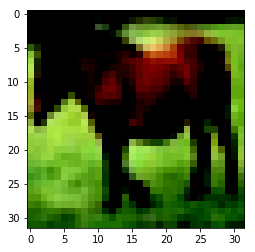

In [4]:
plt.imshow(x_train[0,:,:,:])

In [5]:
print(np.min(x_train))
print(np.max(x_train))

-1.0
1.0


In [6]:
x_train.shape

(5000, 32, 32, 3)

In [7]:
#works

gan = WGANGP(input_dim = (32,32,3)
        , critic_conv_filters = [64,64,128,128]
        , critic_conv_kernel_size = [5,5,5,5]
        , critic_conv_strides = [2,2,2,1]
        , critic_conv_padding = 'same'
        , critic_batch_norm_momentum = None
        , critic_activation = 'leaky_relu'
        , critic_dropout_rate = None
        , critic_learning_rate = 0.00005
        , generator_initial_dense_layer_size = (8, 8, 64)
        , generator_use_upsampling = [True,True, False,False]
        , generator_conv_t_filters = [128,64, 64,3]
        , generator_conv_t_kernel_size = [5,5,5,5]
        , generator_conv_t_strides = [1,1,1,1]
        , generator_conv_t_padding = 'same'
        , generator_batch_norm_momentum = 0.8
        , generator_activation = 'leaky_relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.00005
        , optimiser = 'rmsprop'
        , z_dim = 100
        )


gan.save(RUN_FOLDER)




In [8]:
#gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [9]:
gan.critic.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    (None, 32, 32, 3)         0         
_________________________________________________________________
critic_conv_0 (Conv2D)       (None, 16, 16, 64)        4864      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 64)        0         
_________________________________________________________________
critic_conv_1 (Conv2D)       (None, 8, 8, 64)          102464    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 8, 8, 64)          0         
_________________________________________________________________
critic_conv_2 (Conv2D)       (None, 4, 4, 128)         204928    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 4, 4, 128)         0         
__________

In [10]:
gan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4096)              413696    
_________________________________________________________________
batch_normalization_1 (Batch (None, 4096)              16384     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 4096)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 8, 8, 64)          0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 16, 16, 64)        0         
_________________________________________________________________
generator_conv_t_0 (Conv2DTr (None, 16, 16, 128)       204928    
__________

## training

In [11]:
d_losses, g_losses, d_accs, g_accs = gan.train(     
    x_train
    , batch_size = 128
    , epochs = 2000
    , run_folder = RUN_FOLDER
    , print_every_n_batches = 10
    , initial_epoch = 0
    , n_critic = 5
    , clip_threshold = 0.01
)

/Users/davidfoster/.virtualenvs/gdl/lib/python3.6/site-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 (5, 1) [D loss: (9.4)] [D acc: (0.000)] [G loss: 0.0] [G acc: 0.266]
1 (5, 1) [D loss: (9.0)] [D acc: (0.000)] [G loss: -0.1] [G acc: 0.906]
2 (5, 1) [D loss: (8.4)] [D acc: (0.000)] [G loss: -0.4] [G acc: 0.992]
3 (5, 1) [D loss: (7.6)] [D acc: (0.000)] [G loss: -1.0] [G acc: 0.961]
4 (5, 1) [D loss: (6.8)] [D acc: (0.000)] [G loss: -1.8] [G acc: 0.977]
5 (5, 1) [D loss: (5.6)] [D acc: (0.000)] [G loss: -2.8] [G acc: 0.984]
6 (5, 1) [D loss: (4.7)] [D acc: (0.000)] [G loss: -3.5] [G acc: 1.000]
7 (5, 1) [D loss: (3.8)] [D acc: (0.000)] [G loss: -3.7] [G acc: 1.000]
8 (5, 1) [D loss: (2.6)] [D acc: (0.000)] [G loss: -3.1] [G acc: 1.000]
9 (5, 1) [D loss: (1.0)] [D acc: (0.000)] [G loss: -1.7] [G acc: 1.000]
10 (5, 1) [D loss: (0.1)] [D acc: (0.000)] [G loss: -0.1] [G acc: 0.430]
11 (5, 1) [D loss: (-1.4)] [D acc: (0.000)] [G loss: 1.1] [G acc: 0.203]
12 (5, 1) [D loss: (-3.0)] [D acc: (0.000)] [G loss: 3.1] [G acc: 0.109]
13 (5, 1) [D loss: (-3.7)] [D acc: (0.000)] [G loss: 4.6] [G a

113 (5, 1) [D loss: (-2.7)] [D acc: (0.000)] [G loss: 0.9] [G acc: 0.352]
114 (5, 1) [D loss: (-3.1)] [D acc: (0.000)] [G loss: 3.2] [G acc: 0.031]
115 (5, 1) [D loss: (-2.7)] [D acc: (0.000)] [G loss: 2.1] [G acc: 0.094]
116 (5, 1) [D loss: (-2.4)] [D acc: (0.000)] [G loss: 0.8] [G acc: 0.086]
117 (5, 1) [D loss: (-3.0)] [D acc: (0.000)] [G loss: -3.0] [G acc: 0.852]
118 (5, 1) [D loss: (-3.1)] [D acc: (0.000)] [G loss: 3.5] [G acc: 0.164]
119 (5, 1) [D loss: (-2.6)] [D acc: (0.000)] [G loss: 4.1] [G acc: 0.000]
120 (5, 1) [D loss: (-2.8)] [D acc: (0.000)] [G loss: -1.4] [G acc: 0.602]
121 (5, 1) [D loss: (-2.6)] [D acc: (0.000)] [G loss: 2.5] [G acc: 0.031]
122 (5, 1) [D loss: (-2.5)] [D acc: (0.000)] [G loss: 1.5] [G acc: 0.195]
123 (5, 1) [D loss: (-2.8)] [D acc: (0.000)] [G loss: 1.5] [G acc: 0.062]
124 (5, 1) [D loss: (-2.4)] [D acc: (0.000)] [G loss: 4.8] [G acc: 0.000]
125 (5, 1) [D loss: (-2.5)] [D acc: (0.000)] [G loss: -0.6] [G acc: 0.656]
126 (5, 1) [D loss: (-2.7)] [D acc:

223 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -2.1] [G acc: 1.000]
224 (5, 1) [D loss: (-1.9)] [D acc: (0.000)] [G loss: -4.3] [G acc: 0.969]
225 (5, 1) [D loss: (-1.9)] [D acc: (0.000)] [G loss: 0.9] [G acc: 0.289]
226 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -2.2] [G acc: 0.922]
227 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: 0.1] [G acc: 0.445]
228 (5, 1) [D loss: (-2.5)] [D acc: (0.000)] [G loss: -5.2] [G acc: 0.891]
229 (5, 1) [D loss: (-2.4)] [D acc: (0.000)] [G loss: -1.9] [G acc: 0.719]
230 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -0.6] [G acc: 0.609]
231 (5, 1) [D loss: (-2.5)] [D acc: (0.000)] [G loss: 0.0] [G acc: 0.547]
232 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: 5.9] [G acc: 0.023]
233 (5, 1) [D loss: (-2.0)] [D acc: (0.000)] [G loss: -6.8] [G acc: 1.000]
234 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -5.6] [G acc: 1.000]
235 (5, 1) [D loss: (-2.5)] [D acc: (0.000)] [G loss: 3.8] [G acc: 0.125]
236 (5, 1) [D loss: (-2.4)] [D

333 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -3.8] [G acc: 0.859]
334 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: -0.5] [G acc: 0.625]
335 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -0.1] [G acc: 0.492]
336 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -3.4] [G acc: 0.906]
337 (5, 1) [D loss: (-1.9)] [D acc: (0.000)] [G loss: -1.3] [G acc: 0.953]
338 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -2.2] [G acc: 1.000]
339 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -2.9] [G acc: 0.953]
340 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: -4.3] [G acc: 0.992]
341 (5, 1) [D loss: (-2.0)] [D acc: (0.000)] [G loss: -1.7] [G acc: 0.859]
342 (5, 1) [D loss: (-2.0)] [D acc: (0.000)] [G loss: -1.8] [G acc: 0.906]
343 (5, 1) [D loss: (-1.9)] [D acc: (0.000)] [G loss: -0.7] [G acc: 0.758]
344 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -4.8] [G acc: 1.000]
345 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -1.4] [G acc: 0.742]
346 (5, 1) [D loss: (-2.5

443 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -0.3] [G acc: 0.617]
444 (5, 1) [D loss: (-2.5)] [D acc: (0.000)] [G loss: -5.5] [G acc: 0.906]
445 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: 2.6] [G acc: 0.188]
446 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -2.4] [G acc: 1.000]
447 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -8.1] [G acc: 1.000]
448 (5, 1) [D loss: (-2.6)] [D acc: (0.000)] [G loss: 4.7] [G acc: 0.039]
449 (5, 1) [D loss: (-1.9)] [D acc: (0.000)] [G loss: -1.7] [G acc: 0.930]
450 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -1.7] [G acc: 0.883]
451 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -4.8] [G acc: 1.000]
452 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -0.2] [G acc: 0.578]
453 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: 2.1] [G acc: 0.055]
454 (5, 1) [D loss: (-2.4)] [D acc: (0.000)] [G loss: -0.4] [G acc: 0.586]
455 (5, 1) [D loss: (-2.7)] [D acc: (0.000)] [G loss: -2.9] [G acc: 0.773]
456 (5, 1) [D loss: (-2.1)] 

553 (5, 1) [D loss: (-2.6)] [D acc: (0.000)] [G loss: -0.8] [G acc: 0.586]
554 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -5.9] [G acc: 0.969]
555 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: 4.5] [G acc: 0.008]
556 (5, 1) [D loss: (-1.9)] [D acc: (0.000)] [G loss: 1.0] [G acc: 0.141]
557 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -5.1] [G acc: 0.992]
558 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: -2.1] [G acc: 0.953]
559 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: 0.9] [G acc: 0.211]
560 (5, 1) [D loss: (-2.4)] [D acc: (0.000)] [G loss: -4.1] [G acc: 1.000]
561 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: 1.9] [G acc: 0.031]
562 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -3.0] [G acc: 0.914]
563 (5, 1) [D loss: (-2.6)] [D acc: (0.000)] [G loss: 2.3] [G acc: 0.289]
564 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -2.7] [G acc: 1.000]
565 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: -1.3] [G acc: 0.867]
566 (5, 1) [D loss: (-2.2)] [D

663 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -0.9] [G acc: 0.648]
664 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -1.0] [G acc: 0.836]
665 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -5.6] [G acc: 0.984]
666 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: 1.2] [G acc: 0.125]
667 (5, 1) [D loss: (-2.0)] [D acc: (0.000)] [G loss: -0.7] [G acc: 0.664]
668 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -5.4] [G acc: 1.000]
669 (5, 1) [D loss: (-1.9)] [D acc: (0.000)] [G loss: -5.3] [G acc: 1.000]
670 (5, 1) [D loss: (-1.9)] [D acc: (0.000)] [G loss: -3.1] [G acc: 0.969]
671 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -2.4] [G acc: 0.984]
672 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -0.2] [G acc: 0.547]
673 (5, 1) [D loss: (-1.6)] [D acc: (0.000)] [G loss: -2.6] [G acc: 0.938]
674 (5, 1) [D loss: (-1.9)] [D acc: (0.000)] [G loss: -3.9] [G acc: 1.000]
675 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: 3.1] [G acc: 0.047]
676 (5, 1) [D loss: (-1.8)]

773 (5, 1) [D loss: (-2.0)] [D acc: (0.000)] [G loss: -0.1] [G acc: 0.516]
774 (5, 1) [D loss: (-2.0)] [D acc: (0.000)] [G loss: -5.3] [G acc: 1.000]
775 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -4.2] [G acc: 0.938]
776 (5, 1) [D loss: (-1.9)] [D acc: (0.000)] [G loss: -5.4] [G acc: 1.000]
777 (5, 1) [D loss: (-1.9)] [D acc: (0.000)] [G loss: 1.0] [G acc: 0.336]
778 (5, 1) [D loss: (-1.9)] [D acc: (0.000)] [G loss: -3.2] [G acc: 1.000]
779 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -2.5] [G acc: 0.883]
780 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -3.7] [G acc: 0.977]
781 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: -4.0] [G acc: 1.000]
782 (5, 1) [D loss: (-1.9)] [D acc: (0.000)] [G loss: -6.6] [G acc: 1.000]
783 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -3.8] [G acc: 0.984]
784 (5, 1) [D loss: (-2.0)] [D acc: (0.000)] [G loss: -0.5] [G acc: 0.625]
785 (5, 1) [D loss: (-1.9)] [D acc: (0.000)] [G loss: -5.4] [G acc: 1.000]
786 (5, 1) [D loss: (-2.3)

883 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -0.6] [G acc: 0.539]
884 (5, 1) [D loss: (-1.7)] [D acc: (0.000)] [G loss: -7.9] [G acc: 1.000]
885 (5, 1) [D loss: (-1.6)] [D acc: (0.000)] [G loss: -4.1] [G acc: 0.992]
886 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: -4.9] [G acc: 1.000]
887 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: 0.1] [G acc: 0.531]
888 (5, 1) [D loss: (-2.0)] [D acc: (0.000)] [G loss: -6.8] [G acc: 1.000]
889 (5, 1) [D loss: (-1.9)] [D acc: (0.000)] [G loss: -4.9] [G acc: 1.000]
890 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: -1.2] [G acc: 0.695]
891 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: -2.1] [G acc: 0.789]
892 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -3.9] [G acc: 0.914]
893 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -5.3] [G acc: 1.000]
894 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: -3.8] [G acc: 0.977]
895 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: -1.0] [G acc: 0.773]
896 (5, 1) [D loss: (-1.8)

993 (5, 1) [D loss: (-1.9)] [D acc: (0.000)] [G loss: -2.6] [G acc: 0.875]
994 (5, 1) [D loss: (-2.0)] [D acc: (0.000)] [G loss: -8.6] [G acc: 1.000]
995 (5, 1) [D loss: (-1.7)] [D acc: (0.000)] [G loss: -2.8] [G acc: 0.953]
996 (5, 1) [D loss: (-1.9)] [D acc: (0.000)] [G loss: -6.7] [G acc: 1.000]
997 (5, 1) [D loss: (-1.7)] [D acc: (0.000)] [G loss: -0.9] [G acc: 0.656]
998 (5, 1) [D loss: (-1.5)] [D acc: (0.000)] [G loss: -6.7] [G acc: 1.000]
999 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: -6.3] [G acc: 1.000]
1000 (5, 1) [D loss: (-1.9)] [D acc: (0.000)] [G loss: -1.1] [G acc: 0.898]
1001 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: -8.9] [G acc: 1.000]
1002 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: -2.2] [G acc: 0.773]
1003 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: -2.3] [G acc: 0.891]
1004 (5, 1) [D loss: (-1.9)] [D acc: (0.000)] [G loss: -3.8] [G acc: 0.906]
1005 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: -4.5] [G acc: 1.000]
1006 (5, 1) [D loss

1101 (5, 1) [D loss: (-1.6)] [D acc: (0.000)] [G loss: -4.6] [G acc: 1.000]
1102 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: -3.3] [G acc: 0.961]
1103 (5, 1) [D loss: (-1.4)] [D acc: (0.000)] [G loss: -4.6] [G acc: 1.000]
1104 (5, 1) [D loss: (-1.9)] [D acc: (0.000)] [G loss: 0.5] [G acc: 0.430]
1105 (5, 1) [D loss: (-1.5)] [D acc: (0.000)] [G loss: -5.2] [G acc: 1.000]
1106 (5, 1) [D loss: (-1.4)] [D acc: (0.000)] [G loss: -3.6] [G acc: 0.961]
1107 (5, 1) [D loss: (-1.7)] [D acc: (0.000)] [G loss: -9.6] [G acc: 1.000]
1108 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: 0.9] [G acc: 0.203]
1109 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -3.9] [G acc: 0.883]
1110 (5, 1) [D loss: (-1.7)] [D acc: (0.000)] [G loss: 1.0] [G acc: 0.195]
1111 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: -0.3] [G acc: 0.625]
1112 (5, 1) [D loss: (-1.9)] [D acc: (0.000)] [G loss: -10.6] [G acc: 1.000]
1113 (5, 1) [D loss: (-1.7)] [D acc: (0.000)] [G loss: -0.3] [G acc: 0.633]
1114 (5, 1) [D

1210 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: -3.2] [G acc: 1.000]
1211 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: 3.8] [G acc: 0.016]
1212 (5, 1) [D loss: (-1.7)] [D acc: (0.000)] [G loss: -3.3] [G acc: 1.000]
1213 (5, 1) [D loss: (-1.6)] [D acc: (0.000)] [G loss: -6.1] [G acc: 1.000]
1214 (5, 1) [D loss: (-1.7)] [D acc: (0.000)] [G loss: 3.9] [G acc: 0.000]
1215 (5, 1) [D loss: (-1.7)] [D acc: (0.000)] [G loss: -2.9] [G acc: 0.914]
1216 (5, 1) [D loss: (-2.0)] [D acc: (0.000)] [G loss: -2.0] [G acc: 0.812]
1217 (5, 1) [D loss: (-1.7)] [D acc: (0.000)] [G loss: -4.5] [G acc: 1.000]
1218 (5, 1) [D loss: (-2.0)] [D acc: (0.000)] [G loss: -0.6] [G acc: 0.695]
1219 (5, 1) [D loss: (-1.7)] [D acc: (0.000)] [G loss: -2.0] [G acc: 0.930]
1220 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: 1.4] [G acc: 0.086]
1221 (5, 1) [D loss: (-1.4)] [D acc: (0.000)] [G loss: -4.7] [G acc: 0.992]
1222 (5, 1) [D loss: (-1.2)] [D acc: (0.000)] [G loss: -8.7] [G acc: 1.000]
1223 (5, 1) [D 

1319 (5, 1) [D loss: (-1.6)] [D acc: (0.000)] [G loss: -2.0] [G acc: 0.766]
1320 (5, 1) [D loss: (-1.9)] [D acc: (0.000)] [G loss: -6.3] [G acc: 1.000]
1321 (5, 1) [D loss: (-1.9)] [D acc: (0.000)] [G loss: 2.6] [G acc: 0.039]
1322 (5, 1) [D loss: (-1.3)] [D acc: (0.000)] [G loss: -2.6] [G acc: 1.000]
1323 (5, 1) [D loss: (-2.0)] [D acc: (0.000)] [G loss: -1.6] [G acc: 0.680]
1324 (5, 1) [D loss: (-1.5)] [D acc: (0.000)] [G loss: -4.6] [G acc: 1.000]
1325 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: -0.5] [G acc: 0.523]
1326 (5, 1) [D loss: (-2.5)] [D acc: (0.000)] [G loss: -3.2] [G acc: 0.766]
1327 (5, 1) [D loss: (-1.7)] [D acc: (0.000)] [G loss: 5.4] [G acc: 0.000]
1328 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -6.0] [G acc: 0.938]
1329 (5, 1) [D loss: (-1.6)] [D acc: (0.000)] [G loss: -6.7] [G acc: 1.000]
1330 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: -2.8] [G acc: 1.000]
1331 (5, 1) [D loss: (-1.5)] [D acc: (0.000)] [G loss: -0.4] [G acc: 0.648]
1332 (5, 1) [D

1428 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: -4.3] [G acc: 1.000]
1429 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -1.6] [G acc: 0.711]
1430 (5, 1) [D loss: (-2.0)] [D acc: (0.000)] [G loss: -1.9] [G acc: 0.758]
1431 (5, 1) [D loss: (-1.5)] [D acc: (0.000)] [G loss: -1.4] [G acc: 0.883]
1432 (5, 1) [D loss: (-1.5)] [D acc: (0.000)] [G loss: -4.4] [G acc: 1.000]
1433 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -4.9] [G acc: 0.891]
1434 (5, 1) [D loss: (-1.7)] [D acc: (0.000)] [G loss: 0.7] [G acc: 0.367]
1435 (5, 1) [D loss: (-1.7)] [D acc: (0.000)] [G loss: -2.2] [G acc: 0.766]
1436 (5, 1) [D loss: (-1.9)] [D acc: (0.000)] [G loss: 0.7] [G acc: 0.359]
1437 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: -5.7] [G acc: 0.984]
1438 (5, 1) [D loss: (-1.3)] [D acc: (0.000)] [G loss: -1.0] [G acc: 0.844]
1439 (5, 1) [D loss: (-1.7)] [D acc: (0.000)] [G loss: -9.3] [G acc: 1.000]
1440 (5, 1) [D loss: (-1.2)] [D acc: (0.000)] [G loss: -1.8] [G acc: 0.828]
1441 (5, 1) [D

1537 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: -1.9] [G acc: 0.930]
1538 (5, 1) [D loss: (-1.4)] [D acc: (0.000)] [G loss: -3.1] [G acc: 0.984]
1539 (5, 1) [D loss: (-1.2)] [D acc: (0.000)] [G loss: -1.3] [G acc: 0.797]
1540 (5, 1) [D loss: (-1.6)] [D acc: (0.000)] [G loss: 1.0] [G acc: 0.242]
1541 (5, 1) [D loss: (-1.7)] [D acc: (0.000)] [G loss: -8.0] [G acc: 1.000]
1542 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: 1.3] [G acc: 0.289]
1543 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: 0.8] [G acc: 0.375]
1544 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: -8.2] [G acc: 1.000]
1545 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: 2.6] [G acc: 0.242]
1546 (5, 1) [D loss: (-1.5)] [D acc: (0.000)] [G loss: -1.4] [G acc: 0.914]
1547 (5, 1) [D loss: (-1.7)] [D acc: (0.000)] [G loss: -0.2] [G acc: 0.562]
1548 (5, 1) [D loss: (-1.6)] [D acc: (0.000)] [G loss: -3.8] [G acc: 1.000]
1549 (5, 1) [D loss: (-1.9)] [D acc: (0.000)] [G loss: 0.9] [G acc: 0.352]
1550 (5, 1) [D lo

1646 (5, 1) [D loss: (-1.5)] [D acc: (0.000)] [G loss: 2.8] [G acc: 0.000]
1647 (5, 1) [D loss: (-1.9)] [D acc: (0.000)] [G loss: 1.6] [G acc: 0.359]
1648 (5, 1) [D loss: (-2.2)] [D acc: (0.000)] [G loss: -3.8] [G acc: 0.906]
1649 (5, 1) [D loss: (-1.5)] [D acc: (0.000)] [G loss: 1.8] [G acc: 0.078]
1650 (5, 1) [D loss: (-1.4)] [D acc: (0.000)] [G loss: -4.0] [G acc: 1.000]
1651 (5, 1) [D loss: (-1.5)] [D acc: (0.000)] [G loss: -0.2] [G acc: 0.547]
1652 (5, 1) [D loss: (-1.9)] [D acc: (0.000)] [G loss: -0.4] [G acc: 0.578]
1653 (5, 1) [D loss: (-1.9)] [D acc: (0.000)] [G loss: -3.2] [G acc: 0.898]
1654 (5, 1) [D loss: (-2.3)] [D acc: (0.000)] [G loss: 1.7] [G acc: 0.312]
1655 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: -2.9] [G acc: 0.812]
1656 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: -1.9] [G acc: 0.766]
1657 (5, 1) [D loss: (-2.0)] [D acc: (0.000)] [G loss: 0.9] [G acc: 0.477]
1658 (5, 1) [D loss: (-1.3)] [D acc: (0.000)] [G loss: -4.4] [G acc: 0.992]
1659 (5, 1) [D lo

1755 (5, 1) [D loss: (-1.4)] [D acc: (0.000)] [G loss: 5.3] [G acc: 0.000]
1756 (5, 1) [D loss: (-1.2)] [D acc: (0.000)] [G loss: -3.3] [G acc: 0.984]
1757 (5, 1) [D loss: (-2.1)] [D acc: (0.000)] [G loss: -8.4] [G acc: 1.000]
1758 (5, 1) [D loss: (-1.1)] [D acc: (0.000)] [G loss: -1.5] [G acc: 0.883]
1759 (5, 1) [D loss: (-1.9)] [D acc: (0.000)] [G loss: 5.5] [G acc: 0.008]
1760 (5, 1) [D loss: (-1.2)] [D acc: (0.000)] [G loss: 0.1] [G acc: 0.516]
1761 (5, 1) [D loss: (-1.6)] [D acc: (0.000)] [G loss: 0.6] [G acc: 0.297]
1762 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: -6.2] [G acc: 1.000]
1763 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: -4.0] [G acc: 0.977]
1764 (5, 1) [D loss: (-1.5)] [D acc: (0.000)] [G loss: 5.7] [G acc: 0.000]
1765 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: -1.8] [G acc: 0.766]
1766 (5, 1) [D loss: (-1.5)] [D acc: (0.000)] [G loss: -4.1] [G acc: 1.000]
1767 (5, 1) [D loss: (-1.3)] [D acc: (0.000)] [G loss: -0.0] [G acc: 0.508]
1768 (5, 1) [D lo

1864 (5, 1) [D loss: (-1.9)] [D acc: (0.000)] [G loss: -3.6] [G acc: 0.992]
1865 (5, 1) [D loss: (-1.4)] [D acc: (0.000)] [G loss: -4.4] [G acc: 1.000]
1866 (5, 1) [D loss: (-1.5)] [D acc: (0.000)] [G loss: 1.3] [G acc: 0.320]
1867 (5, 1) [D loss: (-1.6)] [D acc: (0.000)] [G loss: 2.4] [G acc: 0.078]
1868 (5, 1) [D loss: (-1.4)] [D acc: (0.000)] [G loss: -0.7] [G acc: 0.664]
1869 (5, 1) [D loss: (-1.7)] [D acc: (0.000)] [G loss: -3.3] [G acc: 1.000]
1870 (5, 1) [D loss: (-1.4)] [D acc: (0.000)] [G loss: -3.6] [G acc: 1.000]
1871 (5, 1) [D loss: (-1.6)] [D acc: (0.000)] [G loss: -2.5] [G acc: 0.953]
1872 (5, 1) [D loss: (-1.6)] [D acc: (0.000)] [G loss: 5.3] [G acc: 0.008]
1873 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: 2.5] [G acc: 0.180]
1874 (5, 1) [D loss: (-1.6)] [D acc: (0.000)] [G loss: -4.8] [G acc: 0.992]
1875 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: -5.7] [G acc: 0.977]
1876 (5, 1) [D loss: (-1.5)] [D acc: (0.000)] [G loss: 2.9] [G acc: 0.047]
1877 (5, 1) [D lo

1973 (5, 1) [D loss: (-1.6)] [D acc: (0.000)] [G loss: -8.3] [G acc: 1.000]
1974 (5, 1) [D loss: (-1.1)] [D acc: (0.000)] [G loss: -0.6] [G acc: 0.609]
1975 (5, 1) [D loss: (-1.5)] [D acc: (0.000)] [G loss: 1.6] [G acc: 0.086]
1976 (5, 1) [D loss: (-1.5)] [D acc: (0.000)] [G loss: -2.0] [G acc: 0.914]
1977 (5, 1) [D loss: (-1.4)] [D acc: (0.000)] [G loss: -2.5] [G acc: 1.000]
1978 (5, 1) [D loss: (-1.6)] [D acc: (0.000)] [G loss: 0.0] [G acc: 0.523]
1979 (5, 1) [D loss: (-1.3)] [D acc: (0.000)] [G loss: -2.1] [G acc: 0.992]
1980 (5, 1) [D loss: (-1.5)] [D acc: (0.000)] [G loss: -1.8] [G acc: 0.719]
1981 (5, 1) [D loss: (-1.8)] [D acc: (0.000)] [G loss: 0.3] [G acc: 0.531]
1982 (5, 1) [D loss: (-1.7)] [D acc: (0.000)] [G loss: 4.0] [G acc: 0.031]
1983 (5, 1) [D loss: (-1.6)] [D acc: (0.000)] [G loss: -4.7] [G acc: 1.000]
1984 (5, 1) [D loss: (-1.5)] [D acc: (0.000)] [G loss: -2.8] [G acc: 0.984]
1985 (5, 1) [D loss: (-1.6)] [D acc: (0.000)] [G loss: -5.8] [G acc: 0.914]
1986 (5, 1) [D l

In [12]:
idx = np.random.randint(0, x_train.shape[0], 1)[0]
gan.discriminator.predict(np.array([x_train[idx]]))

AttributeError: 'WGANGP' object has no attribute 'discriminator'

In [ ]:
noise = np.random.normal(0, 1, (1, gan.z_dim))
gen_imgs = gan.generator.predict(noise)
gan.discriminator.predict(np.array([gen_imgs[0]]))

In [ ]:
gan.train_discriminator(x_train, batch_size = 32, clip_threshold = 0.01)

In [ ]:
fake = np.ones((128,1))
noise = np.random.normal(0, 1, (128, 100))
gen_imgs = gan.generator.predict(noise)
gan.discriminator.train_on_batch(gen_imgs, fake)

In [ ]:
[(np.min(x), np.max(x)) for x in gan.discriminator.get_weights()]

In [ ]:
gan.train_generator(batch_size = 128)

In [ ]:
[np.round((np.min(x), np.max(x)), 4) for x in gan.generator.get_weights()]

In [ ]:
plt.imshow(np.clip((x[200]+1)*0.5,0,1))

In [ ]:
gan.discriminator.predict(x)

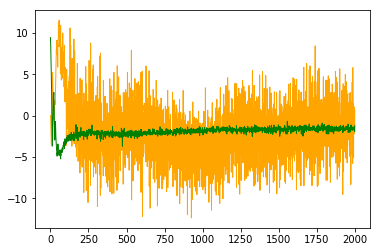

In [14]:
plt.plot(g_losses, color='orange', linewidth=1)
plt.plot([x[0] for x in d_losses], color='green', linewidth=1)


In [ ]:
for i in range(100):
    print(gan.discriminator.predict(np.array([x_train[i]]))[0])

In [ ]:
noise = np.random.normal(0, 1, 100)
img = gan.generator.predict(np.array([noise]))[0]

print(img.shape)
plt.imshow(np.clip((img+1)*0.5,0,1))

gan.discriminator.predict(np.array([img]))[0]

In [ ]:
len(gan.discriminator.get_weights())

In [ ]:
gan.generator.get_weights()

In [ ]:
gan.discriminator.layers

In [ ]:
pointer = 0
for x, y in enumerate(gan.discriminator.layers):
    
    print(y)
    print(y.trainable)
    for i in gan.discriminator.layers[x].get_weights():
        
        print(pointer)
        print(i.shape)
        pointer+=1
        
        

In [ ]:
len(gan.discriminator.get_weights())

In [ ]:
gan.discriminator.get_weights()[2]

In [ ]:
gan.discriminator.get_weights()[22]

In [ ]:
x_train[0][16]

In [13]:
gan.model.save_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))